# MNIST

In [ ]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Reshape, Activation, BatchNormalization as BN, GaussianNoise as GN
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler as LRS, ReduceLROnPlateau 
import matplotlib.pyplot as plt

In [ ]:
batch_size = 100
epochs = 100
num_classes=10

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

training set (60000, 28, 28)
test set (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    zoom_range=0.2,
    rotation_range = 5)

In [ ]:
# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))
model.add(GN(0.3))

model.add(Dense(512))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 gaussian_noise_20 (Gaussian  (None, 784)              0         
 Noise)                                                          
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization_20 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 gaussian_noise_21 (Gaussian  (None, 512)              0         
 Noise)                                                          
                                                      

In [ ]:
sgd=SGD(lr=0.1, decay=0.0, momentum=0.5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, cooldown=1,
                              patience=10, min_lr=0.005)


model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history=model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            callbacks=[reduce_lr],
                            verbose=1)

Epoch 1/100
600/600 [==============================] - 12s 19ms/step - loss: 0.7190 - accuracy: 0.7628 - val_loss: 0.1327 - val_accuracy: 0.9631 - lr: 0.1000
Epoch 2/100
600/600 [==============================] - 12s 19ms/step - loss: 0.4082 - accuracy: 0.8662 - val_loss: 0.0924 - val_accuracy: 0.9699 - lr: 0.1000
Epoch 3/100
600/600 [==============================] - 11s 19ms/step - loss: 0.3363 - accuracy: 0.8921 - val_loss: 0.0741 - val_accuracy: 0.9760 - lr: 0.1000
Epoch 4/100
600/600 [==============================] - 12s 19ms/step - loss: 0.3074 - accuracy: 0.9016 - val_loss: 0.0688 - val_accuracy: 0.9767 - lr: 0.1000
Epoch 5/100
600/600 [==============================] - 12s 19ms/step - loss: 0.2839 - accuracy: 0.9093 - val_loss: 0.0694 - val_accuracy: 0.9770 - lr: 0.1000
Epoch 6/100
600/600 [==============================] - 12s 19ms/step - loss: 0.2616 - accuracy: 0.9164 - val_loss: 0.0606 - val_accuracy: 0.9805 - lr: 0.1000
Epoch 7/100
600/600 [==============================]

600/600 [==============================] - 11s 19ms/step - loss: 0.1150 - accuracy: 0.9623 - val_loss: 0.0299 - val_accuracy: 0.9900 - lr: 0.1000
Epoch 53/100
600/600 [==============================] - 12s 20ms/step - loss: 0.1144 - accuracy: 0.9637 - val_loss: 0.0273 - val_accuracy: 0.9901 - lr: 0.1000
Epoch 54/100
600/600 [==============================] - 12s 20ms/step - loss: 0.1161 - accuracy: 0.9626 - val_loss: 0.0259 - val_accuracy: 0.9910 - lr: 0.1000
Epoch 55/100
600/600 [==============================] - 12s 19ms/step - loss: 0.1132 - accuracy: 0.9635 - val_loss: 0.0290 - val_accuracy: 0.9901 - lr: 0.1000
Epoch 56/100
600/600 [==============================] - 12s 19ms/step - loss: 0.1124 - accuracy: 0.9632 - val_loss: 0.0245 - val_accuracy: 0.9911 - lr: 0.1000
Epoch 57/100
600/600 [==============================] - 12s 20ms/step - loss: 0.1128 - accuracy: 0.9625 - val_loss: 0.0250 - val_accuracy: 0.9919 - lr: 0.1000
Epoch 58/100
600/600 [==============================] - 12s

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.01867581717669964
Test accuracy: 0.9929999709129333


In [ ]:
1-score[1]

0.00700002908706665

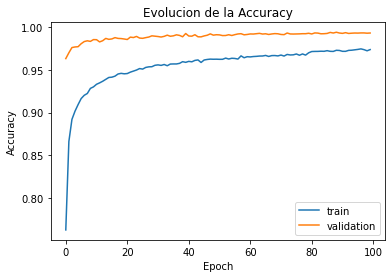

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Evolucion de la Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

# CIFAR

In [13]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.layers import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.callbacks import LearningRateScheduler as LRS
from keras.callbacks import ReduceLROnPlateau as RLRP
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [2]:
batch_size = 128
epochs = 110
num_classes=10

In [3]:
def configure_callbacks(model_id, kpi_to_monitor='val_accuracy'):
    # Without log/ or models/ subfolder as not possible to access unexisting folders
    # If possible to train with jupyter revise
    name = "cnn"
    log_filename = '%s-%s.log' % ("cnn", model_id)
    csv_logger = CSVLogger(log_filename)
    
    chk_1_model_filename = '%s-%s-{epoch:04d}-{%s:.6f}.h5' % (name, model_id, kpi_to_monitor)
    chk_2_model_filename = '%s-%s.h5' % (name, model_id)
    
    # Save best model fully not only weights after each epoch (period=1) 
    # with best accuracy value (mode=max, save_best_only=True)
    checkpoint1 = ModelCheckpoint(
        chk_1_model_filename,
        monitor=kpi_to_monitor,
        save_best_only=True,
        save_weights_only=False, 
        verbose=1, mode='max', period=1
    )

    checkpoint2 = ModelCheckpoint(
        chk_2_model_filename, 
        monitor=kpi_to_monitor,
        save_best_only=False,
        save_weights_only=False, 
        verbose=1, mode='auto', period=1
    )

    callbacks = [csv_logger, checkpoint1, checkpoint2]
    return callbacks

In [4]:
datagen_plus = ImageDataGenerator(width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  zoom_range=[1.0,1.1],
                                  rotation_range=10.0,
                                  shear_range=0.1)

In [5]:
# Define a learning rate scheduler
def scheduler(epoch):
    if epoch < 50:
        return 0.1
    elif epoch < 75:
        return 0.01
    elif epoch < 150:
        return 0.001
    else:
        return 0.0005

scheduler_lr = LRS(scheduler)

In [6]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

170508288/170498071 [==============================] - 12s 0us/step
training set (50000, 32, 32, 3)
test set (10000, 32, 32, 3)


In [7]:
# Optimizer 
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)

In [8]:
def CBGN(model, filters, gaussian_noise, ishape=0):
    if (ishape!=0):
        model.add(Conv2D(filters, (3, 3), padding='same',
                 input_shape=ishape))
    else:
        model.add(Conv2D(filters, (3, 3), padding='same'))

        model.add(BN())
        model.add(GN(gaussian_noise))
        model.add(Activation('relu'))

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 gaussian_noise (GaussianNoi  (None, 32, 32, 64)       0         
 se)                                                             
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3

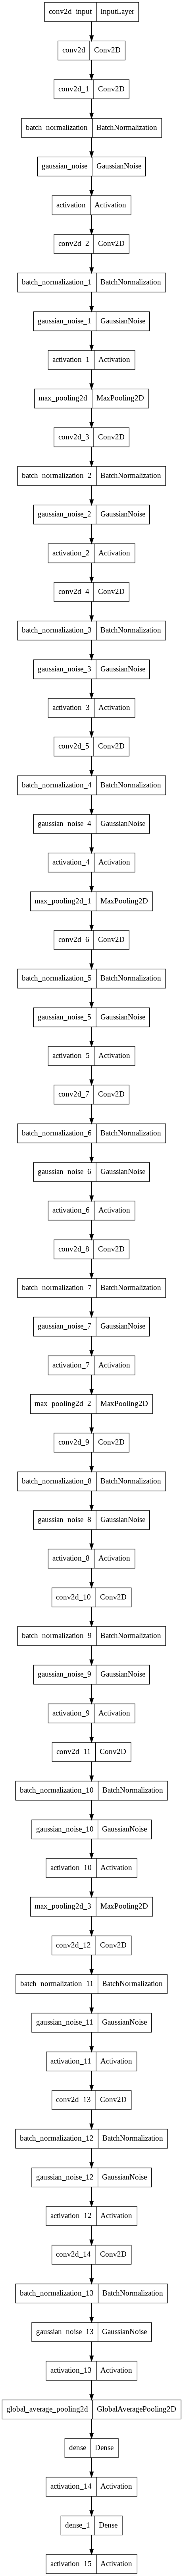

In [9]:
model = Sequential()

model = CBGN(model, 64, 0.1, x_train.shape[1:])
model = CBGN(model, 64, 0.2)
model = CBGN(model, 64, 0.2)

model.add(MaxPooling2D(pool_size=(2, 2)))

model = CBGN(model, 128, 0.3)
model = CBGN(model, 128, 0.3)
model = CBGN(model, 128, 0.3)

model.add(MaxPooling2D(pool_size=(2, 2)))

model = CBGN(model, 256, 0.3)
model = CBGN(model, 256, 0.3)
model = CBGN(model, 256, 0.3)

model.add(MaxPooling2D(pool_size=(2, 2)))

model = CBGN(model, 512, 0.3)
model = CBGN(model, 512, 0.3)
model = CBGN(model, 512, 0.3)

model.add(MaxPooling2D(pool_size=(2, 2)))

model = CBGN(model, 512, 0.3)
model = CBGN(model, 512, 0.3)
model = CBGN(model, 512, 0.3)

model.add(GlobalAveragePooling2D())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

tf.keras.utils.plot_model(model)

In [10]:
model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    
history = model.fit(datagen_plus.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=len(x_train)/batch_size,
                        epochs=epochs,
                        shuffle=True,
                        verbose=1,
                        validation_data=(x_test, y_test),                   
                        callbacks=[configure_callbacks('model_full'), scheduler_lr])

Epoch 1/110
391/390 [==============================] - ETA: 0s - loss: 1.7299 - accuracy: 0.3363
Epoch 00001: val_accuracy improved from -inf to 0.21310, saving model to cnn-model_full-0001-0.213100.h5

Epoch 00001: saving model to cnn-model_full.h5
390/390 [==============================] - 90s 196ms/step - loss: 1.7299 - accuracy: 0.3363 - val_loss: 2.6995 - val_accuracy: 0.2131 - lr: 0.1000
Epoch 2/110
391/390 [==============================] - ETA: 0s - loss: 1.3348 - accuracy: 0.5154
Epoch 00002: val_accuracy improved from 0.21310 to 0.52130, saving model to cnn-model_full-0002-0.521300.h5

Epoch 00002: saving model to cnn-model_full.h5
390/390 [==============================] - 73s 187ms/step - loss: 1.3348 - accuracy: 0.5154 - val_loss: 1.4844 - val_accuracy: 0.5213 - lr: 0.1000
Epoch 3/110
391/390 [==============================] - ETA: 0s - loss: 1.0577 - accuracy: 0.6266
Epoch 00003: val_accuracy improved from 0.52130 to 0.63300, saving model to cnn-model_full-0003-0.633000.h

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test error:', (1-score[1]))

Test loss: 0.4153912663459778
Test accuracy: 0.9218000173568726
Test error: 0.07819998264312744


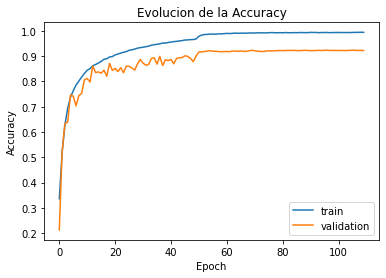

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Evolucion de la Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()